In [86]:
# Step 1: 导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Step 2: 读取数据
url = "https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/credit_card_default/UCI_Credit_Card.csv"
df = pd.read_csv(url)


In [87]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [89]:
# Step 3: 数据初探
print("数据基本情况：")
print(df.head())
print("数据维度：", df.shape)
print("每列缺失值：\n", df.isnull().sum())

数据基本情况：
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0     

In [90]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [91]:
df.shape

(30000, 25)

In [92]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [93]:
print(df['default.payment.next.month'].value_counts())

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


In [94]:
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [95]:
# Remove ID
df = df.drop('ID', axis=1)

In [96]:
# Education column should range from 1 to 6
# min(education) is 0 and 5, 6 are unknow
# convert 0, 5, 6 to 4
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

In [97]:
# Marriage column should range from 1 to 3
# min(marriage) is 0
# convert 0 to 3
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [98]:
# pay_0 ~ pay_6 columns should range from -1 to 9
# the minimum values are -2, it should be converted to -1
# regard it as pay duly
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = df[col].replace(-2, -1)

In [99]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.075267,-0.007700,-0.030033,-0.075733,-0.114667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.990775,1.035798,1.025036,0.987436,0.941921,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [100]:
df[['EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].value_counts()

EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
2          2          0      0      0      0      0      0       2616
           1          0      0      0      0      0      0       2413
1          2          0      0      0      0      0      0       2028
                     -1     -1     -1     -1     -1     -1       1485
           1         -1     -1     -1     -1     -1     -1       1163
                                                                 ... 
2          2          2      3      3      2      2      2          1
1          2          2      2      4      4      3      2          1
2          2          2      3      2      2      2      3          1
1          2          2      2      6      6      5      4          1
4          3          2      2      0      0      0      0          1
Name: count, Length: 2325, dtype: int64

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='default.payment.next.month', ylabel='count'>

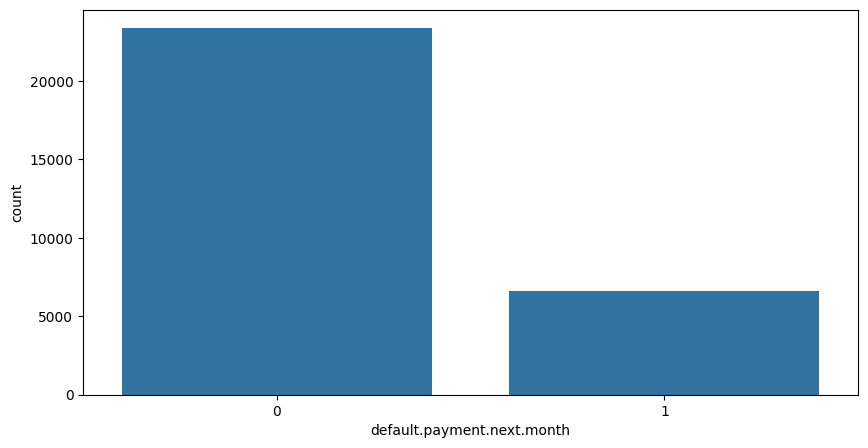

In [101]:
print(df['default.payment.next.month'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x = 'default.payment.next.month', data = df)

C:\Users\q\AppData\Local\Temp\ipykernel_3304\2386985435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['default.payment.next.month']
C:\Users\q\AppData\Local\Temp\ipykernel_3304\2386985435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 1000x500 with 0 Axes>

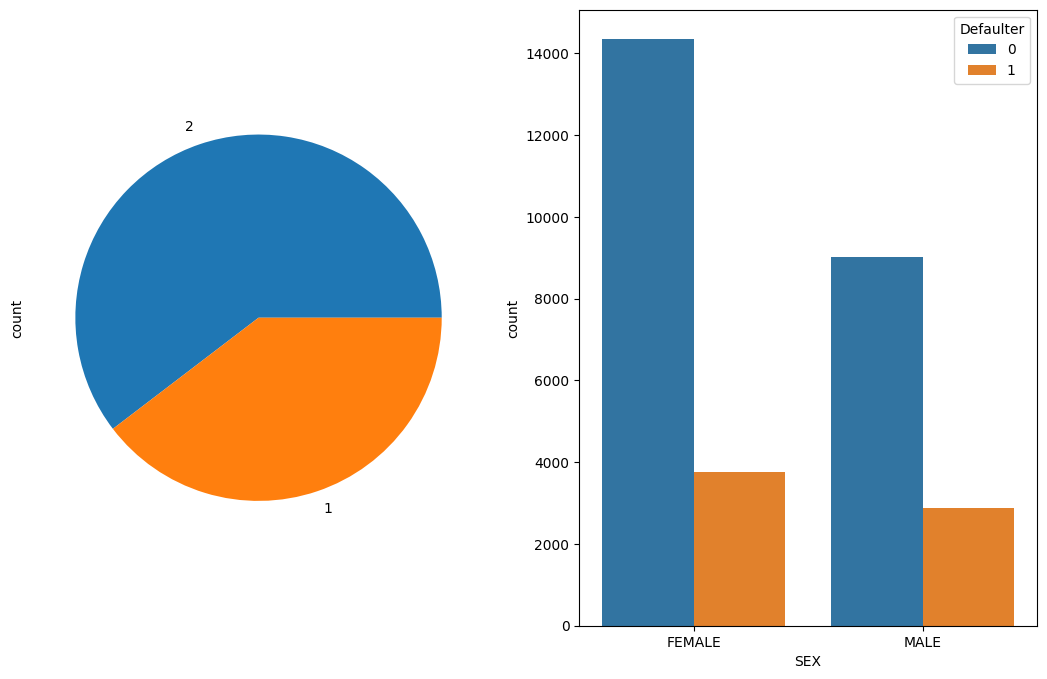

<Figure size 1000x500 with 0 Axes>

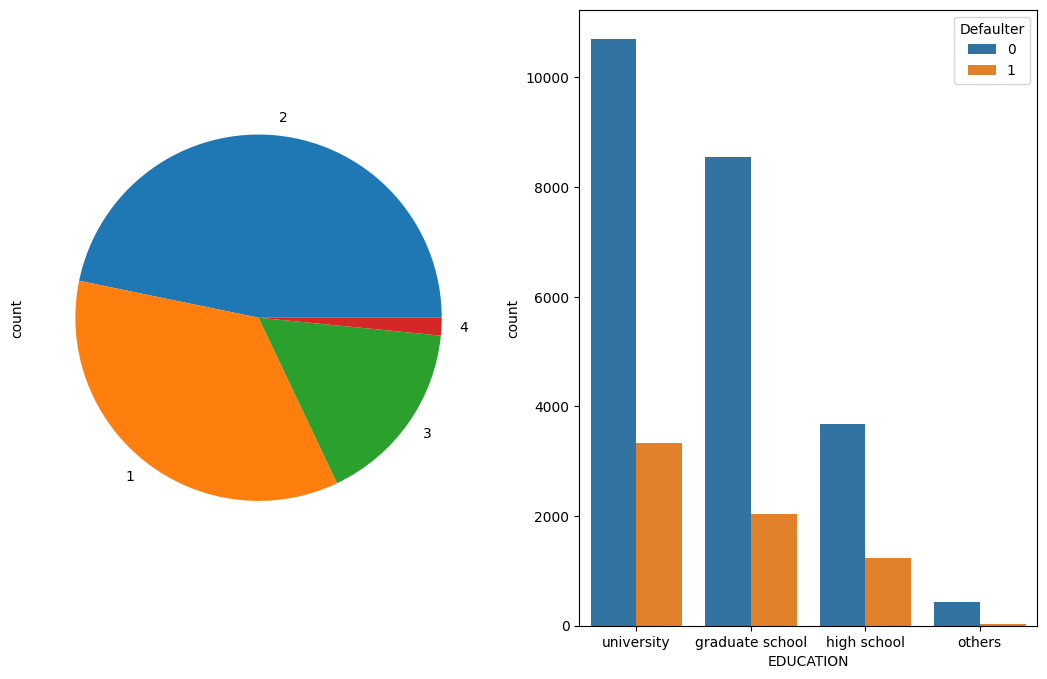

<Figure size 1000x500 with 0 Axes>

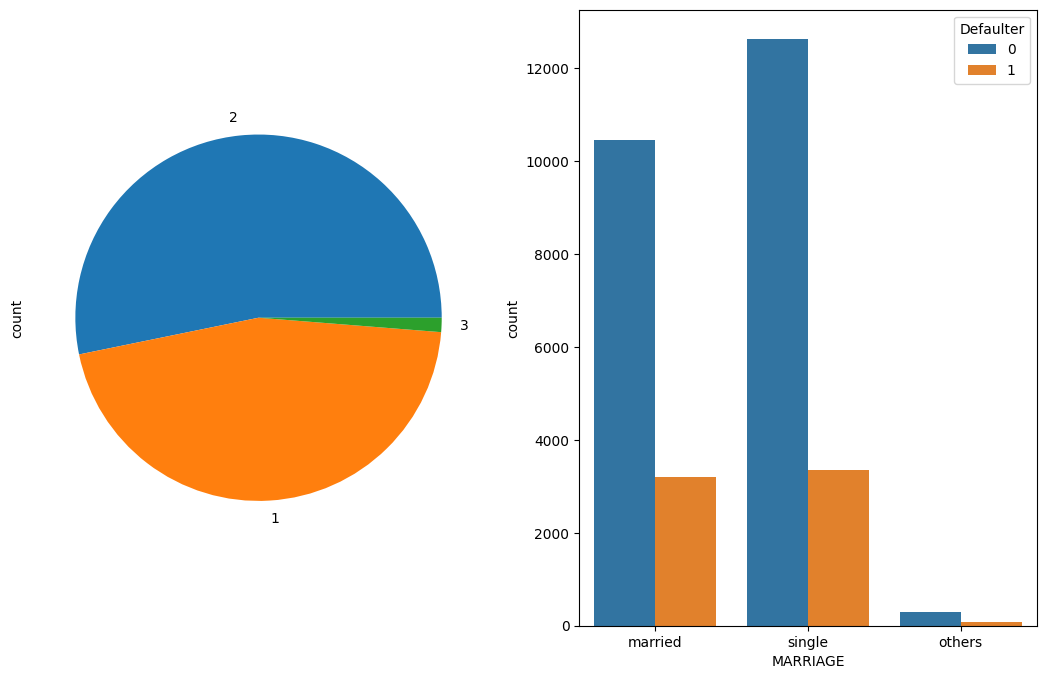

In [102]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default.payment.next.month']

df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [103]:
# Feature engineering
X = df.drop('default.payment.next.month', axis=1)

# Remain dependant variable
y = df['default.payment.next.month']

In [104]:
# Standarize some variables since ranges are different
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
# Cluster data into tets group （30%） and train group
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

In [72]:
# Two models: logistic regression, random forest
# logistic regression, the most common binary model
# Build logistic regression model

lr = LogisticRegression(max_iter=1000)  # max_iter设大一点避免收敛警告
lr.fit(X_train, y_train)  # 用训练集训练
y_pred_lr = lr.predict(X_test)  # 用测试集预测

In [73]:
# Build random forest model

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # 用训练集训练
y_pred_rf = rf.predict(X_test)  # 用测试集预测

In [74]:
print("logistic regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy rate: ", accuracy_score(y_test, y_pred_lr))
print("Confusion metric: \n", confusion_matrix(y_test, y_pred_lr))

print("\n Random Forest: ")
print(classification_report(y_test, y_pred_rf))
print("Accuracy rate: ", accuracy_score(y_test, y_pred_rf))
print("Confusion metric:\n", confusion_matrix(y_test, y_pred_rf))

logistic regression
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7040
           1       0.67      0.26      0.38      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.61      0.63      9000
weighted avg       0.79      0.81      0.78      9000

Accuracy rate:  0.8115555555555556
Confusion metric: 
 [[6791  249]
 [1447  513]]

 Random Forest: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy rate:  0.814
Confusion metric:
 [[6624  416]
 [1258  702]]


In [75]:
# Enhance the identification ability
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)  # 用训练集训练
y_pred_lr = lr.predict(X_test)  # 用测试集预测

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)  # 用训练集训练
y_pred_rf = rf.predict(X_test)  # 用测试集预测

In [76]:
print("logistic regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy rate: ", accuracy_score(y_test, y_pred_lr))
print("Confusion metric: \n", confusion_matrix(y_test, y_pred_lr))

print("\n Random Forest: ")
print(classification_report(y_test, y_pred_rf))
print("Accuracy rate: ", accuracy_score(y_test, y_pred_rf))
print("Confusion metric:\n", confusion_matrix(y_test, y_pred_rf))

logistic regression
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      7040
           1       0.41      0.61      0.49      1960

    accuracy                           0.72      9000
   macro avg       0.64      0.68      0.65      9000
weighted avg       0.77      0.72      0.74      9000

Accuracy rate:  0.7226666666666667
Confusion metric: 
 [[5306 1734]
 [ 762 1198]]

 Random Forest: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.63      0.33      0.44      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy rate:  0.8124444444444444
Confusion metric:
 [[6656  384]
 [1304  656]]


In [77]:
# 年龄分箱
df['AGE_BIN'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 100], labels=[1, 2, 3, 4, 5])

# 额度分箱
df['LIMIT_BAL_BIN'] = pd.cut(df['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 500000, 1000000], labels=[1,2,3,4,5])

In [82]:
# 还款率：还款率能直观反映客户的还款意愿。
# 防止分母为0加1
for i in range(1, 7):
    df[f'REPAY_RATIO{i}'] = df[f'PAY_AMT{i}'] / (df[f'BILL_AMT{i}'] + 1)

# 账单金额变化率：有助于捕捉消费或还款习惯的变化。
df['BILL_AMT_CHANGE'] = df['BILL_AMT1'] - df['BILL_AMT2']

In [83]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [84]:
print(np.isinf(X[numeric_cols]).sum())
print(np.isnan(X[numeric_cols]).sum())

PAY_4              0
EDUCATION          0
PAY_0              0
PAY_AMT1           0
AGE                0
BILL_AMT3          0
BILL_AMT_CHANGE    0
PAY_AMT4           0
SEX                0
PAY_AMT5           0
PAY_3              0
MARRIAGE           0
REPAY_RATIO2       4
PAY_6              0
LIMIT_BAL          0
PAY_AMT3           0
PAY_AMT6           0
BILL_AMT4          0
BILL_AMT6          0
REPAY_RATIO1       8
BILL_AMT5          0
PAY_2              0
BILL_AMT1          0
PAY_5              0
PAY_AMT2           0
BILL_AMT2          0
dtype: int64
PAY_4               0
EDUCATION           0
PAY_0               0
PAY_AMT1            0
AGE                 0
BILL_AMT3           0
BILL_AMT_CHANGE     0
PAY_AMT4            0
SEX                 0
PAY_AMT5            0
PAY_3               0
MARRIAGE            0
REPAY_RATIO2       14
PAY_6               0
LIMIT_BAL           0
PAY_AMT3            0
PAY_AMT6            0
BILL_AMT4           0
BILL_AMT6           0
REPAY_RATIO1        8
B

In [106]:
import xgboost as xgb

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


c:\Users\q\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [19:57:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
print("【XGBoost】Result: ")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction Category')
plt.ylabel('True category')
plt.title('Confusion Matrix')
plt.show()


【XGBoost】Result: 
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7040
           1       0.45      0.61      0.52      1960

    accuracy                           0.75      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.75      0.77      9000

Accuracy:  0.7543333333333333
Confusion Matrix: 
 [[5591 1449]
 [ 762 1198]]


NameError: name 'labels' is not defined

<Figure size 600x500 with 0 Axes>

In [6]:
# 4. 特征工程
# 财务特征
data['UTILIZATION_RATIO'] = data['BILL_AMT1'] / data['LIMIT_BAL'].replace(0, 1)
# 行为特征
data['MAX_DELAY'] = data[pay_cols].max(axis=1)
# 趋势特征（示例：账单斜率）
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
x = np.arange(6)
data['BILL_TREND'] = data[bill_cols].apply(lambda row: np.polyfit(x, row, 1)[0], axis=1)

In [7]:
# 5. 数据预处理
# 删除ID
data = data.drop('ID', axis=1)
# 独热编码
cat_cols = ['SEX','EDUCATION','MARRIAGE']
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
# 标准化
scaler = StandardScaler()
num_cols = ['LIMIT_BAL','AGE'] + bill_cols + ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [8]:
# 6. 划分数据集
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [9]:
# 7. 建模与评估（示例：逻辑回归）
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
probs = lr.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test, probs):.4f}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test)):.4f}")


AUC: 0.7701
Recall: 0.6240


In [10]:
# 8. 对比随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced_subsample')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample')

In [11]:
# 9. 特征重要性分析
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

UTILIZATION_RATIO    0.061174
MAX_DELAY            0.060505
PAY_0                0.060439
AGE                  0.057080
BILL_TREND           0.056479
BILL_AMT1            0.051083
LIMIT_BAL            0.050883
PAY_AMT1             0.047094
BILL_AMT2            0.046128
PAY_AMT2             0.045379
BILL_AMT3            0.045166
BILL_AMT4            0.045151
PAY_AMT3             0.042963
BILL_AMT5            0.042855
PAY_AMT6             0.042828
BILL_AMT6            0.042610
PAY_AMT4             0.041794
PAY_AMT5             0.038801
PAY_2                0.026898
PAY_3                0.020168
PAY_4                0.014880
PAY_5                0.010897
SEX_2                0.010214
MARRIAGE_2           0.009917
EDUCATION_2          0.009663
PAY_6                0.008326
EDUCATION_3          0.007186
MARRIAGE_3           0.001727
EDUCATION_4          0.001709
dtype: float64